# Data Cleaning and Preprocessing

### Import turnstiles data

In [1]:
from datetime import *
from datetime import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# collect links
date_from = date(2013,1,5)
date_to = date(2013,12,28)
address = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_"
links = []
pointer = date_from
while pointer <= date_to:
    links.append(address + pointer.strftime("%y%m%d") + ".txt")
    pointer += timedelta(days = 7)

In [3]:
# read date
dataframe_list = []
for link in links:
    dataframe_list.append(pd.read_csv(link, header = None, usecols=range(0, 43)))

In [4]:
# define a function that rearrange the data in every line
def clean(df):
    info =  df.iloc[:,0:3]
    df1 = pd.concat([info,df.iloc[:,3:8]],axis=1)
    df2 = pd.concat([info,df.iloc[:,8:13]],axis=1)
    df3 = pd.concat([info,df.iloc[:,13:18]],axis=1)
    df4 = pd.concat([info,df.iloc[:,18:23]],axis=1)
    df5 = pd.concat([info,df.iloc[:,23:28]],axis=1)
    df6 = pd.concat([info,df.iloc[:,28:33]],axis=1)
    df7 = pd.concat([info,df.iloc[:,33:38]],axis=1)
    df8 = pd.concat([info,df.iloc[:,38:43]],axis=1)
    listofdf = [df1,df2,df3,df4,df5,df6,df7,df8]
    for df in listofdf:
        df.columns = ['C/A','UNIT','SCP','DATE','TIME','DESC','ENTRIES','EXITS']
    wholedf = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis=0)
    return(wholedf.sort_values(by = ['C/A','UNIT','SCP','DATE','TIME']))  

In [12]:
# combine all list into one dataframe
data_2013 = pd.concat([clean(i) for i in dataframe_list], axis = 0)

# set column index
data_2013 = data_2013.reset_index()

# drop the first index column
data_2013.drop(['index'], axis = 1, inplace = True)

# remove error data with 'DATE' == NaN
data_2013_removed = data_2013[data_2013['DATE'].notnull()]


### Import station data

In [20]:
stationname = pd.read_excel('Remote-Booth-Station.xls')

In [21]:
# check how many stations are there
stationname['Station'].nunique()

395

In [22]:
# check the dataframe
stationname.head()

,Remote,Booth,Station,Line Name,Division
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT


In [23]:
# check which index is unique for every turnstile, Remote or Booth
#(stationname['Remote'].value_counts()>1).any()
(stationname['Booth'].value_counts()>1).any()

False

In [24]:
# keep only 'Booth' and 'Station' columns
stationname = stationname[['Booth', 'Station']]

In [25]:
# change column index name in order to bring into correspondence with turnstiles dataframe
stationname.rename(columns = {'Booth': 'C/A', 'Station': 'STATION'}, inplace = True)

In [26]:
# check is there any missing values
stationname['C/A'].isnull().sum()

0

In [27]:
# check duplicates
len(stationname)

768

### Combine into one single dataframe

In [28]:
# merge turnstiles dataframe and stationname on 'C/A', delete duplicate rows
final_df_2013 = pd.merge(data_2013_removed, stationname, on = ['C/A'])
final_df_2013.drop_duplicates()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION
0,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0,LEXINGTON AVE
1,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0,LEXINGTON AVE
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0,LEXINGTON AVE
3,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0,LEXINGTON AVE
4,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,LEXINGTON AVE
5,A002,R051,02-00-00,01-01-13,23:00:00,REGULAR,3932782.0,1355864.0,LEXINGTON AVE
6,A002,R051,02-00-00,01-02-13,03:00:00,REGULAR,3932806.0,1355869.0,LEXINGTON AVE
7,A002,R051,02-00-00,01-02-13,07:00:00,REGULAR,3932819.0,1355901.0,LEXINGTON AVE
8,A002,R051,02-00-00,01-02-13,10:50:00,REGULAR,3932983.0,1356198.0,LEXINGTON AVE
9,A002,R051,02-00-00,01-02-13,10:51:08,REGULAR,3932984.0,1356198.0,LEXINGTON AVE


In [29]:
# set a new column names 'DATETIME' as datatime values in order to have easy query according to data & time
final_df_2013['DATETIME'] = pd.to_datetime((final_df_2013['DATE'] + ' ' + final_df_2013['TIME']), format='%m-%d-%y %H:%M:%S')
final_df_2013.head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME
0,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0,LEXINGTON AVE,2013-01-01 03:00:00
1,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0,LEXINGTON AVE,2013-01-01 07:00:00
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0,LEXINGTON AVE,2013-01-01 11:00:00
3,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0,LEXINGTON AVE,2013-01-01 15:00:00
4,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,LEXINGTON AVE,2013-01-01 19:00:00


In [30]:
# since we only care about the data in 2013, so delete data in 2012
final_df_2013 = final_df_2013.loc[final_df_2013['DATETIME'].dt.year != 2012]


In [31]:
# define a new column names 'TURNSTILE_ID' that combine 'C/A', 'UNIT' and 'SCP' with underscore 
# as unique ID for every turnstile
final_df_2013['TURNSTILE_ID'] = final_df_2013['C/A'] + '-' + final_df_2013['UNIT'] + '-' + final_df_2013['SCP']

In [32]:
# calculate the net entries and net exits for every turnstile by using series.diff
final_df_2013['NET_ENTRIES'] = final_df_2013.groupby(['TURNSTILE_ID','STATION'])['ENTRIES'].transform(pd.Series.diff)
final_df_2013['NET_EXITS'] = final_df_2013.groupby(['TURNSTILE_ID','STATION'])['EXITS'].transform(pd.Series.diff)
final_df_2013.head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS
0,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0,LEXINGTON AVE,2013-01-01 03:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0,LEXINGTON AVE,2013-01-01 07:00:00,A002-R051-02-00-00,15.0,7.0
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0,LEXINGTON AVE,2013-01-01 11:00:00,A002-R051-02-00-00,28.0,53.0
3,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0,LEXINGTON AVE,2013-01-01 15:00:00,A002-R051-02-00-00,100.0,37.0
4,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,LEXINGTON AVE,2013-01-01 19:00:00,A002-R051-02-00-00,235.0,38.0


In [33]:
# set net entries and net exits which <0 to nan.
final_df_2013.loc[final_df_2013['NET_ENTRIES'] < 0, ['NET_ENTRIES']] = np.nan
final_df_2013.loc[final_df_2013['NET_EXITS'] < 0, ['NET_EXITS']] = np.nan

In [34]:
# check statistical fact about net_entries
final_df_2013['NET_ENTRIES'].describe()

count    1.120403e+07
mean     1.801791e+03
std      7.813795e+05
min      0.000000e+00
25%      2.000000e+00
50%      5.200000e+01
75%      2.100000e+02
max      9.168486e+08
Name: NET_ENTRIES, dtype: float64

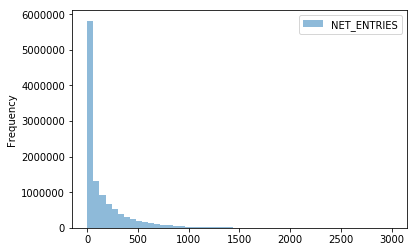

In [35]:
# histogram of net_entries numbers of every turnstile
# it can help to identify the proper cutoff number
final_df_2013.loc[:,['NET_ENTRIES']].plot.hist(range = (0,3000), bins = (50), color='tab:blue', alpha = 0.5)
plt.show()

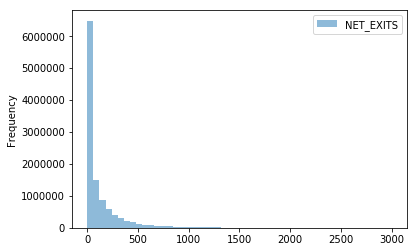

In [36]:
# histogram of net_exits
final_df_2013.loc[:,['NET_EXITS']].plot.hist(range = (0,3000), bins = (50), color='tab:blue', alpha = 0.5)
plt.show()

In [37]:
# investigate the distribution of turnstiles with large net_entries and net_exits
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>0) & (final_df_2013['NET_ENTRIES']< 1000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>1000) & (final_df_2013['NET_ENTRIES']< 2000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>2000) & (final_df_2013['NET_ENTRIES']< 3000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>3000) & (final_df_2013['NET_ENTRIES']< 4000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>4000) & (final_df_2013['NET_ENTRIES']< 5000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>5000) & (final_df_2013['NET_ENTRIES']< 6000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_ENTRIES']>6000),].shape)

(8439200, 13)
(179134, 13)
(9781, 13)
(332, 13)
(63, 13)
(36, 13)
(625, 13)


In [38]:
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>0) & (final_df_2013['NET_EXITS']< 1000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>1000) & (final_df_2013['NET_EXITS']< 2000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>2000) & (final_df_2013['NET_EXITS']< 3000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>3000) & (final_df_2013['NET_EXITS']< 4000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>4000) & (final_df_2013['NET_EXITS']< 5000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>5000) & (final_df_2013['NET_EXITS']< 6000),].shape)
print(final_df_2013.loc[(final_df_2013['NET_EXITS']>6000),].shape)

(8511609, 13)
(125197, 13)
(11751, 13)
(1735, 13)
(178, 13)
(38, 13)
(539, 13)


In [39]:
# set new column names 'BUSYNESS' to describe the sum of net_entries and net_exits for every turnstiles
final_df_2013['BUSYNESS'] = final_df_2013['NET_ENTRIES'] + final_df_2013['NET_EXITS']

In [40]:
# final check for the dataframe
final_df_2013

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS,BUSYNESS
0,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0,LEXINGTON AVE,2013-01-01 03:00:00,A002-R051-02-00-00,NaN,NaN,NaN
1,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0,LEXINGTON AVE,2013-01-01 07:00:00,A002-R051-02-00-00,15.0,7.0,22.0
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0,LEXINGTON AVE,2013-01-01 11:00:00,A002-R051-02-00-00,28.0,53.0,81.0
3,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0,LEXINGTON AVE,2013-01-01 15:00:00,A002-R051-02-00-00,100.0,37.0,137.0
4,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,LEXINGTON AVE,2013-01-01 19:00:00,A002-R051-02-00-00,235.0,38.0,273.0
5,A002,R051,02-00-00,01-01-13,23:00:00,REGULAR,3932782.0,1355864.0,LEXINGTON AVE,2013-01-01 23:00:00,A002-R051-02-00-00,120.0,15.0,135.0
6,A002,R051,02-00-00,01-02-13,03:00:00,REGULAR,3932806.0,1355869.0,LEXINGTON AVE,2013-01-02 03:00:00,A002-R051-02-00-00,24.0,5.0,29.0
7,A002,R051,02-00-00,01-02-13,07:00:00,REGULAR,3932819.0,1355901.0,LEXINGTON AVE,2013-01-02 07:00:00,A002-R051-02-00-00,13.0,32.0,45.0
8,A002,R051,02-00-00,01-02-13,10:50:00,REGULAR,3932983.0,1356198.0,LEXINGTON AVE,2013-01-02 10:50:00,A002-R051-02-00-00,164.0,297.0,461.0
9,A002,R051,02-00-00,01-02-13,10:51:08,REGULAR,3932984.0,1356198.0,LEXINGTON AVE,2013-01-02 10:51:08,A002-R051-02-00-00,1.0,0.0,1.0


In [41]:
# export the final dataframe as CSV file
final_df_2013.to_csv('MTA_Turnstile_2013_raw.csv', index = False)

# Analysis and Visualization

## Import cleaned data

In [42]:
from datetime import *
from datetime import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# read in raw data exported
data = pd.read_csv('MTA_Turnstile_2013_raw.csv')
data['DATETIME'] = pd.to_datetime(data['DATETIME'], format='%Y-%m-%d %H:%M:%S')
data.head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS,BUSYNESS
0,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0,LEXINGTON AVE,2013-01-01 03:00:00,A002-R051-02-00-00,NaN,NaN,NaN
1,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0,LEXINGTON AVE,2013-01-01 07:00:00,A002-R051-02-00-00,15.0,7.0,22.0
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0,LEXINGTON AVE,2013-01-01 11:00:00,A002-R051-02-00-00,28.0,53.0,81.0
3,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0,LEXINGTON AVE,2013-01-01 15:00:00,A002-R051-02-00-00,100.0,37.0,137.0
4,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,LEXINGTON AVE,2013-01-01 19:00:00,A002-R051-02-00-00,235.0,38.0,273.0


In [44]:
# according to the statistical fact above, continue on the following analysis based on a cutoff of 6000 on  
# both net_entries and net_exits
# and generate a new column names 'BUSYNESS' as the sum of net_entries and net_exits
data_6000 = data
data_6000.loc[data_6000['NET_ENTRIES'] > 6000, ['NET_ENTRIES']] = np.nan
data_6000.loc[data_6000['NET_EXITS'] > 6000, ['NET_EXITS']] = np.nan
data_6000['BUSYNESS'] = data_6000['NET_ENTRIES'] + data_6000['NET_EXITS']

### Question 1. All the tracks need maintenance after a period of time and such process always implemented by station and needs over a month. How can we decide when to repair the tracks near a certain station to bring the least inconvenience for passengers?

In [45]:
# select data in Q3 2013
df_Q3 = data_6000[(data_6000['DATE'] >= '07-01-13') & (data_6000['DATE'] <= '09-30-13')]

# select data of 34 ST-PENN STA
df_penn = df_Q3[df_Q3['STATION'] == '34 ST-PENN STA']
df_penn['MONTH'] = df_penn['DATETIME'].dt.month

# calculate the monthly sum of entries and exits respectively
df_penn_daily = df_penn.groupby(['MONTH', 'DATE'])['NET_ENTRIES', 'NET_EXITS'].agg('sum').reset_index()
df_penn_daily.head()

/Users/apple1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,MONTH,DATE,NET_ENTRIES,NET_EXITS
0,7,07-01-13,172986.0,147500.0
1,7,07-02-13,174709.0,151123.0
2,7,07-03-13,170842.0,165916.0
3,7,07-04-13,75692.0,85673.0
4,7,07-05-13,137768.0,117995.0


In [46]:
# calculate monthly mean and std for net_entries and net_exits
df_penn_daily_error = df_penn_daily.groupby('MONTH')['NET_ENTRIES', 'NET_EXITS'].agg(['mean','std'])
df_penn_daily_error

NET_ENTRIES                    NET_EXITS              
                mean           std           mean           std
MONTH                                                          
7      147594.419355  41738.411189  129546.000000  34693.629991
8      141719.290323  39322.441871  125265.677419  33337.201134
9      142649.666667  43748.087658  124443.966667  36994.095194

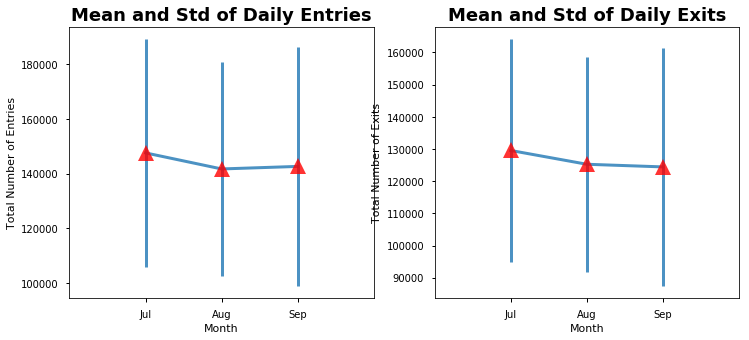

In [47]:
# seperate std and mean of entries and exits respectively, in order to get prepare for plotting
en_std = df_penn_daily_error['NET_ENTRIES', 'std']
en_mean = df_penn_daily_error['NET_ENTRIES', 'mean']
ex_std = df_penn_daily_error['NET_EXITS', 'std']
ex_mean = df_penn_daily_error['NET_EXITS', 'mean']
month = [7,8,9]

# some figure set up
plt.style.use('seaborn-notebook')
plt.gcf().set_size_inches(12, 5, forward=True)

# plot errorbar for net_entries for every month
plt.subplot(121)
plt.errorbar(month, en_mean, yerr = en_std,marker='^', linewidth=3, ms=16, mfc='r', alpha = 0.8)
plt.xticks([7,8,9],['Jul','Aug','Sep'])
plt.xlabel('Month', )
plt.ylabel('Total Number of Entries')
plt.title('Mean and Std of Daily Entries', fontsize = 18, fontweight='bold')
plt.xlim(6,10)

# plot errorbars for net_entries for every month
plt.subplot(122)
plt.errorbar(month, ex_mean, yerr = ex_std,marker='^', linewidth=3, mfc='r', ms=16, alpha = 0.8)
plt.xticks([7,8,9],['Jul','Aug','Sep'])
plt.xlabel('Month')
plt.ylabel('Total Number of Exits')
plt.title('Mean and Std of Daily Exits', fontsize = 18, fontweight='bold')
plt.xlim(6,10)

plt.gcf().savefig('3.png', dpi=200)

plt.show()

In [48]:
# recall the dataframe for daily entries and exits of 34 ST-PENN STA
df_penn_daily.head()

,MONTH,DATE,NET_ENTRIES,NET_EXITS
0,7,07-01-13,172986.0,147500.0
1,7,07-02-13,174709.0,151123.0
2,7,07-03-13,170842.0,165916.0
3,7,07-04-13,75692.0,85673.0
4,7,07-05-13,137768.0,117995.0


/Users/apple1/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


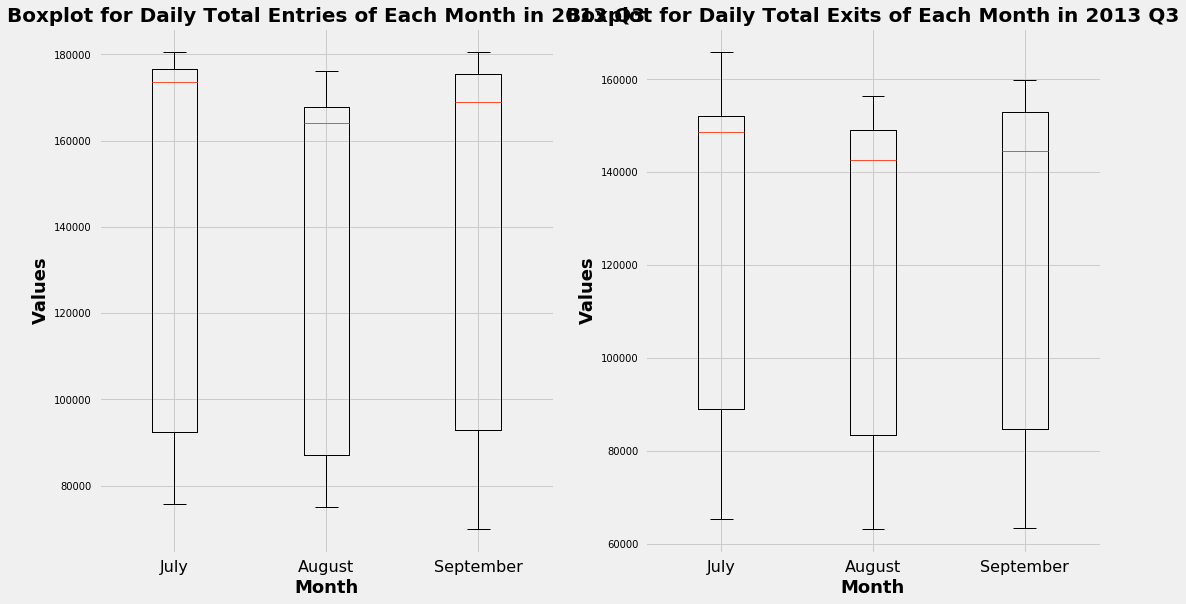

In [50]:
# get monthly entries and exits independently
df_penn_7_en = df_penn_daily[df_penn_daily['MONTH'] == 7]['NET_ENTRIES']
df_penn_7_ex = df_penn_daily[df_penn_daily['MONTH'] == 7]['NET_EXITS']

df_penn_8_en = df_penn_daily[df_penn_daily['MONTH'] == 8]['NET_ENTRIES']
df_penn_8_ex = df_penn_daily[df_penn_daily['MONTH'] == 8]['NET_EXITS']

df_penn_9_en = df_penn_daily[df_penn_daily['MONTH'] == 9]['NET_ENTRIES']
df_penn_9_ex = df_penn_daily[df_penn_daily['MONTH'] == 9]['NET_EXITS']

# set up for the figure
plt.style.use('fivethirtyeight')
plt.gcf().set_size_inches(16, 9, forward=True)

# plot boxplot for monthly entries
plt.subplot(1,2,1)
plt.boxplot([df_penn_7_en, df_penn_8_en, df_penn_9_en])
plt.title('Boxplot for Daily Total Entries of Each Month in 2013 Q3', fontsize = 20,fontweight='bold')
plt.xlabel('Month', fontsize = 18, fontweight='bold')
plt.ylabel('Values', fontsize = 18, fontweight='bold')
plt.xticks([1,2,3],['July', 'August', 'September'], fontsize=16)


# plot boxplot for monthly exits
plt.subplot(1,2,2)
plt.boxplot([df_penn_7_ex, df_penn_8_ex, df_penn_9_ex])
plt.title('Boxplot for Daily Total Exits of Each Month in 2013 Q3', fontsize = 20,fontweight='bold')
plt.xlabel('Month', fontsize = 18, fontweight='bold')
plt.ylabel('Values', fontsize = 18, fontweight='bold')
plt.xticks([1,2,3],['July', 'August', 'September'], fontsize=16)

plt.gcf().savefig('2.png', dpi=200)

plt.show()

### Quesiton 3. What's the monthly change or yearly change of passenger flow by each station? Is it necessary to add or cut turnstiles for a certain station?

In [52]:
'''In this problem, define usage growth/decline as average monthly growth/decline'''

# create a new dataframe df_usage
df_usage = data_6000

# create a new column 'MONTH' in order to query by month
df_usage['MONTH'] = df_usage['DATETIME'].dt.month

# calculate monthly average 'BUSYNESS' of every station
df_usage = df_usage.groupby(['STATION', 'MONTH']).BUSYNESS.agg('mean').reset_index()

# in order to avoid infite percentage growth, set 'BUSYNESS' which equals to 0 as 0.01
df_usage.loc[df_usage['BUSYNESS'] == 0, 'BUSYNESS']= 0.01

# calculate monthly growth/decline of every station
df_usage['PCT_CHANGE'] = df_usage.groupby('STATION').BUSYNESS.pct_change()
df_usage.head()

,STATION,MONTH,BUSYNESS,PCT_CHANGE
0,1 AVE,1,664.871528,NaN
1,1 AVE,2,627.764179,-0.055811
2,1 AVE,3,632.800995,0.008023
3,1 AVE,4,646.139880,0.021079
4,1 AVE,5,585.075513,-0.094506


In [53]:
print("The top 10 stations with most growth are")
df_usage.groupby('STATION')['PCT_CHANGE'].mean().sort_values(ascending=False).head(10)

The top 10 stations with most growth are


STATION
BEACH 90 ST        20.237208
AQUEDUCT TRACK     18.741483
ORCHARD BEACH       4.270974
BEDFORD PARK BL     1.574541
ROCKAWAY PK 116     1.228478
BEACH 98 ST         1.036626
BEACH 44 ST         0.995069
BEACH 105 ST        0.897012
BROAD CHANNEL       0.855182
E TREMONT AVE       0.843580
Name: PCT_CHANGE, dtype: float64

In [54]:
print("The top 10 stations with most decline are")
df_usage.groupby('STATION')['PCT_CHANGE'].mean().sort_values(ascending=False).tail(10)

The top 10 stations with most decline are


STATION
MORRISON AVE      -0.020448
GROVE STREET      -0.022510
HOWARD BCH-JFK    -0.024333
MURRAY ST-B'WAY   -0.024882
FRESH POND ROAD   -0.031798
CASTLE HILL AVE   -0.033098
DYCKMAN ST        -0.036695
WHITEHALL ST      -0.040960
AQUEDUCT-N CNDT   -0.054709
LGA AIRPORT CTB         NaN
Name: PCT_CHANGE, dtype: float64

#### Some analysis on the result

As we can see, the stations with top two growth have much higher growth rate than any other stations. Also, LGA AIRPORT CTB station has no value here. Now that we try to investigate them in detail.

In [55]:
df_usage.loc[df_usage['STATION'] == 'BEACH 90 ST', ]

,STATION,MONTH,BUSYNESS,PCT_CHANGE
1734,BEACH 90 ST,1,0.043546,NaN
1735,BEACH 90 ST,2,0.023179,-0.467715
1736,BEACH 90 ST,3,0.082192,2.545988
1737,BEACH 90 ST,4,0.031308,-0.619091
1738,BEACH 90 ST,5,6.526400,207.460894
1739,BEACH 90 ST,6,94.158076,13.427261
1740,BEACH 90 ST,7,118.713128,0.260785
1741,BEACH 90 ST,8,73.192402,-0.383451
1742,BEACH 90 ST,9,45.289967,-0.381220
1743,BEACH 90 ST,10,36.077320,-0.203415


In [56]:
df_usage.loc[df_usage['STATION'] == 'AQUEDUCT TRACK', ]

,STATION,MONTH,BUSYNESS,PCT_CHANGE
1452,AQUEDUCT TRACK,3,0.373656,NaN
1453,AQUEDUCT TRACK,4,0.025183,-0.932604
1454,AQUEDUCT TRACK,5,0.312676,11.416265
1455,AQUEDUCT TRACK,6,0.128102,-0.590303
1456,AQUEDUCT TRACK,7,0.208723,0.629342
1457,AQUEDUCT TRACK,8,33.123099,157.694251
1458,AQUEDUCT TRACK,9,33.096313,-0.000809
1459,AQUEDUCT TRACK,10,33.327004,0.006970
1460,AQUEDUCT TRACK,11,52.189308,0.565977
1461,AQUEDUCT TRACK,12,46.148936,-0.115740


In [57]:
data.loc[data['STATION'] == 'BEACH 90 ST',].loc[data['DATETIME'].dt.month == 5,]

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS,BUSYNESS,MONTH
3752402,N184,R416,00-00-00,05-01-13,01:00:00,REGULAR,2304518.0,1587028.0,BEACH 90 ST,2013-05-01 01:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752403,N184,R416,00-00-00,05-01-13,05:00:00,REGULAR,2304518.0,1587028.0,BEACH 90 ST,2013-05-01 05:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752404,N184,R416,00-00-00,05-01-13,09:00:00,REGULAR,2304518.0,1587028.0,BEACH 90 ST,2013-05-01 09:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752405,N184,R416,00-00-00,05-01-13,13:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-01 13:00:00,N184-R416-00-00-00,0.0,1.0,1.0,5
3752406,N184,R416,00-00-00,05-01-13,17:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-01 17:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752407,N184,R416,00-00-00,05-01-13,21:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-01 21:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752408,N184,R416,00-00-00,05-02-13,01:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-02 01:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752409,N184,R416,00-00-00,05-02-13,05:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-02 05:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752410,N184,R416,00-00-00,05-02-13,09:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-02 09:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5
3752411,N184,R416,00-00-00,05-02-13,13:00:00,REGULAR,2304518.0,1587029.0,BEACH 90 ST,2013-05-02 13:00:00,N184-R416-00-00-00,0.0,0.0,0.0,5


In [58]:
data.loc[data['STATION'] == 'AQUEDUCT TRACK',].loc[(data['DATETIME'].dt.month == 8),]

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS,BUSYNESS,MONTH
11162962,N181A,R464,00-05-00,08-01-13,00:00:00,REGULAR,11.0,0.0,AQUEDUCT TRACK,2013-08-01 00:00:00,N181A-R464-00-05-00,0.0,0.0,0.0,8
11162963,N181A,R464,00-05-00,08-01-13,04:00:00,REGULAR,11.0,0.0,AQUEDUCT TRACK,2013-08-01 04:00:00,N181A-R464-00-05-00,0.0,0.0,0.0,8
11162964,N181A,R464,00-05-00,08-01-13,04:00:00,RECOVR AUD,11.0,0.0,AQUEDUCT TRACK,2013-08-01 04:00:00,N181A-R464-00-05-00,0.0,0.0,0.0,8
11162965,N181A,R464,00-05-00,08-01-13,08:00:00,REGULAR,11.0,0.0,AQUEDUCT TRACK,2013-08-01 08:00:00,N181A-R464-00-05-00,0.0,0.0,0.0,8
11162966,N181A,R464,00-05-00,08-01-13,11:04:08,DOOR OPEN,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:08,N181A-R464-00-05-00,0.0,0.0,0.0,8
11162967,N181A,R464,00-05-00,08-01-13,11:04:29,LOGON,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:29,N181A-R464-00-05-00,0.0,0.0,0.0,8
11162968,N181A,R464,00-05-00,08-01-13,11:04:34,DOOR CLOSE,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:34,N181A-R464-00-05-00,0.0,0.0,0.0,8
11162969,N181A,R464,00-05-00,08-01-13,11:04:37,DOOR OPEN,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:37,N181A-R464-00-05-00,0.0,0.0,0.0,8
11162970,N181A,R464,00-05-00,08-01-13,11:04:38,DOOR CLOSE,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:38,N181A-R464-00-05-00,0.0,0.0,0.0,8
11162971,N181A,R464,00-05-00,08-01-13,11:04:39,DOOR OPEN,11.0,0.0,AQUEDUCT TRACK,2013-08-01 11:04:39,N181A-R464-00-05-00,0.0,0.0,0.0,8


**For station BEACH 90 ST**
- This station has a large growth in May; look in details of data in May about station BEACH 90 ST, we found that the station is close, and reopened on May 30, 2013.
- After surfer the internet, it is because Hurricane Sandy, the station is close for seven month and reopened on 2013-05-30.   

related link:  https://www.nytimes.com/2013/05/31/nyregion/the-a-line-returns-to-the-rockaways-mostly-for-the-better.html


**For station AQUEDUCT TRACK**
 - This station has a large growth in August; when look in more detials we found that this station was also closed and reopend on 2013-08-02 serve the new resorts world casino only. 

related link: http://subwaynut.com/ind/aqueduct_racetracka/

In [59]:
df_usage.loc[df_usage['STATION'] == 'LGA AIRPORT CTB', ]

,STATION,MONTH,BUSYNESS,PCT_CHANGE
3303,LGA AIRPORT CTB,12,480.214286,NaN


In [60]:
data.loc[data['STATION'] == 'LGA AIRPORT CTB',].loc[data['DATETIME'].dt.month == 8,]

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE_ID,NET_ENTRIES,NET_EXITS,BUSYNESS,MONTH


**For Station LGA AIRPORT CTB**
- It is the station with most decline, actually it is NaN. Query the raw data about this staiton, I found only data in Dec is recorded.

### Question 4. New york subway is well-known for its 24/7 operation, But is that a wise choice to open all the stations 24/7 in 365 days? For some station, when to open and when to close?

In [61]:
# reset the dataframe into daiy busyness
df_station_daily = df_Q3.groupby(['STATION', 'DATE'])['BUSYNESS'].mean().reset_index()
df_station_daily.head()

,STATION,DATE,BUSYNESS
0,1 AVE,07-01-13,653.753846
1,1 AVE,07-02-13,637.652174
2,1 AVE,07-03-13,471.908163
3,1 AVE,07-04-13,495.483871
4,1 AVE,07-05-13,577.521739


/Users/apple1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


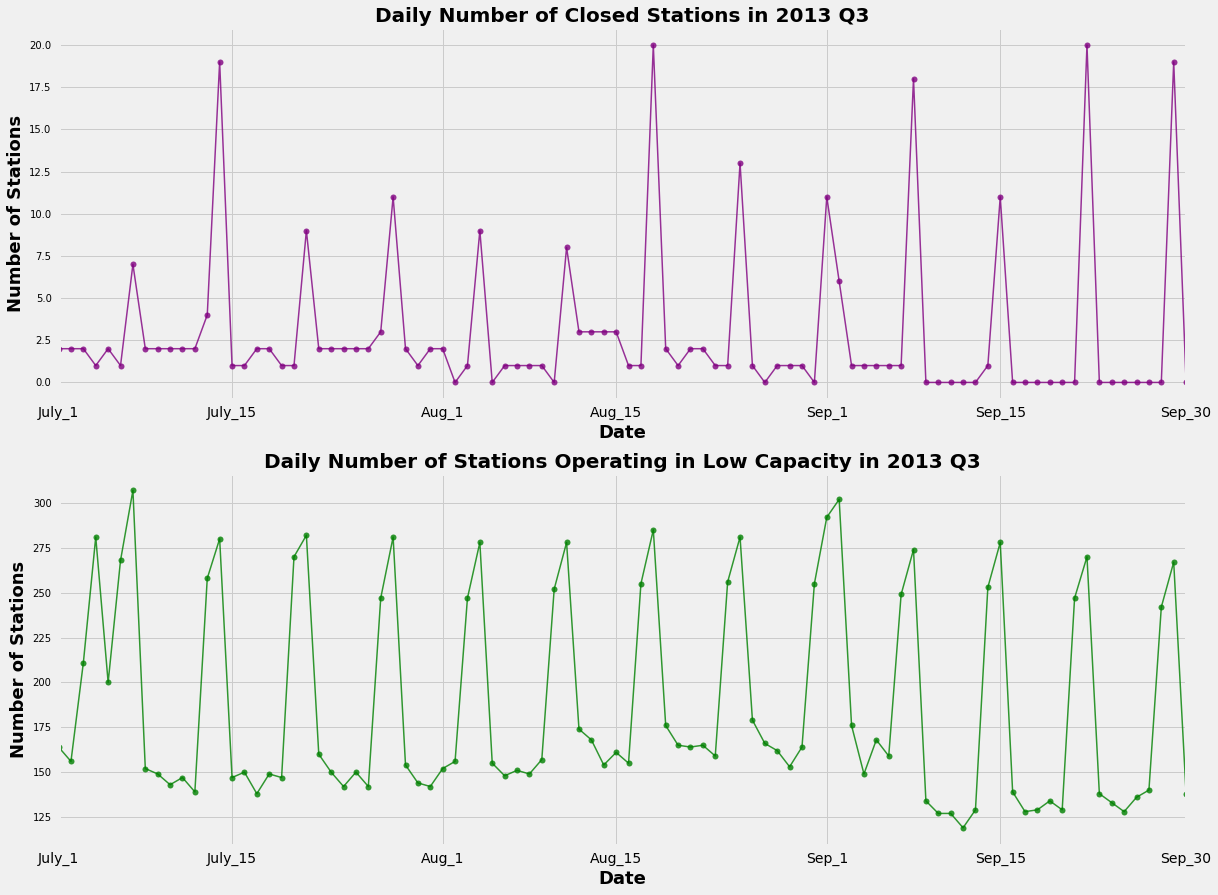

In [62]:
# set up of the figure
plt.style.use('seaborn-notebook')
plt.gcf().set_size_inches(18, 14)

### plot graph for daily number of closed stations
plt.subplot(211)

# define close station as daily busyness less than 3
num_close_df = df_station_daily[df_station_daily['BUSYNESS'] < 3].groupby('DATE')['STATION'].agg('count').reset_index()
date = df_station_daily[['DATE']]
date = date.drop_duplicates()
num_close_plot = pd.merge(date,num_close_df,how = 'left', on='DATE')
num_close_plot.drop_duplicates()
where_are_nan = np.isnan(num_close_plot['STATION'])
num_close_plot['STATION'][where_are_nan] = 0 
num_close_plot = num_close_plot.iloc[:,1]


num_close_plot.plot(linewidth= 1.5, color='purple',marker = 'o', markersize=6, alpha=0.8)
plt.title('Daily Number of Closed Stations in 2013 Q3', fontsize = 20,fontweight='bold')
plt.xlabel('Date', fontsize = 18, fontweight='bold')
plt.ylabel('Number of Stations', fontsize = 18, fontweight='bold')
plt.xticks([0,14,31,45,62,76,91],['July_1','July_15','Aug_1','Aug_15','Sep_1','Sep_15','Sep_30'], fontsize=14)

### plot graph for daily number of stations at low capacity
plt.subplot(212)

# define stations operating at low capacity which busyness is below 50% of the data
num_low_capacity = df_station_daily[(df_station_daily['BUSYNESS'] <= 236) & (df_station_daily['BUSYNESS'] > 3)].groupby('DATE')['STATION'].agg('count')

num_low_capacity.plot(linewidth= 1.5, color='green',marker = 'o', markersize=6, alpha=0.8)
plt.title('Daily Number of Stations Operating in Low Capacity in 2013 Q3', fontsize = 20,fontweight='bold')
plt.xlabel('Date', fontsize = 18, fontweight='bold')
plt.ylabel('Number of Stations', fontsize = 18, fontweight='bold')
plt.xticks([0,14,31,45,62,76,91],['July_1','July_15','Aug_1','Aug_15','Sep_1','Sep_15','Sep_30'],fontsize=14)

plt.gcf().savefig('1.png', dpi=200)

plt.show()

### Question 6. For each line, how can we decide the duration of two trains by month, by day, or even by the time of a day?

In [64]:
# calculate the daily sum of entries and exits respectively
df_Q3_daily_total = df_Q3.groupby('DATE')['NET_ENTRIES','NET_EXITS'].agg('sum')
# rename columns in order to have correct legends
df_Q3_daily_total.rename(columns = {'NET_ENTRIES': 'Daily Total Entries', 'NET_EXITS': 'Daily Total Exits'}, inplace = True)

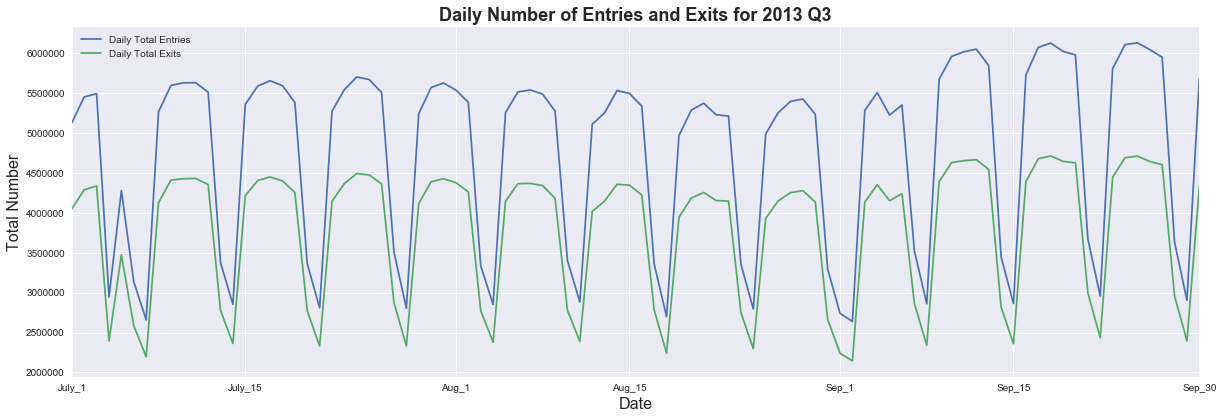

In [65]:
plt.style.use('seaborn')
df_Q3_daily_total.plot()
#plt.style.use('ggplot')

# set some figure properties
plt.gcf().set_size_inches(18, 6, forward=True)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Total Number', fontsize = 16)
plt.title('Daily Number of Entries and Exits for 2013 Q3', fontsize = 18, fontweight ='bold')
plt.xticks([0,14,31,45,62,76,91],['July_1','July_15','Aug_1','Aug_15','Sep_1','Sep_15','Sep_30'])

plt.gcf().savefig('4.png', dpi=200)

plt.show()